<a href="https://colab.research.google.com/github/andronikmk/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/ANDRONIK_MKRTYCHEV_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [0]:
# import df
df = pd.read_csv('/content/data_uk_v3.csv')
df.head()

,Year,Population_of_England_millions,Total_Arable_and_Sown_Acreage,Wheat_Bushels_per_Acre,Rye_Bushels_per_Acre,Barley_Bushels_per_Acre,Oats_Bushels_per_Acre,Pulses_Bushels_per_Acre,Wheat_Million_Bushels,Rye_Million_Bushels,Barley_Million_Bushels,Oats_Million_Bushels,Pulses_Million_Bushels,Cattle_Million,Sheep_Million,Pigs_Million,Milk_Million_Gals,Beef_Million_Lbs,Veal_Million_Lbs,Mutton_Million_Lbs,Pork_Million_Lbs,Wool_Million_Lbs,Hides_Million_Lbs,Hay_Million_Tons,Arable_Output,Pastoral_Output,Total_Agricultural_Output,Current_Price_Arable_Output_Percent,Current_Price_Livestock_Output_Percent,Constant_Price_Arable_Output_Percent,Constant_Price_Livestock_Output_Percent,Tin_Output,Iron_Output,Coal_Output,Wool_Textile_Output,Leather_Output,Foodstuffs_Output,Construction_Output,Printed_Books_Output,Metal_and_Mining_Output,Textiles_and_Leather_Output,Other_Industries_Output,Total_Industry_Output,Government_Services_Output,Trade_and_Transport_Output,Financial_Services_Output,Housing_and_Domestic_Services_Output,Total_Services_Output,England_Real_GDP_Agriculture,England_Real_GDP_Industry,England_Real_GDP_Services,England_Real_GDP,England_Nominal_GDP_mn_P,Price_Index_Agriculture_England,Price_Index_Industry_England,Price_Index_Services_England,Price_Index_GDP_Deflator_England,England_Population_mn,Nom_GDP_per_capita_England,Real_GDP_per_capita_England,GDP_deflator_market_prices,GDP_deflator_factor_cost,Total_Coin_mn_GBP,Total_tax_revenue_000_GBP,Average_weekly_earnings_GBP,Consumer_price_index,Annual_inflation_rate,Farm_wage_rates_GBP,Coal_mining_wages_GBP,Craftsmen_wages_GBP,Labourer_wages_GBP,Average_male_wage_pence_per_day_England,Real_consumtion_earnings,Growth_consumption_earnings,Work_days_England,Annual_average_working_hours_England,Real_consumption_earnings_Growth_GB,Net_Emigration_England_000s
0,1270,4.36,12.52,7.45,9.20,11.44,11.19,1.83,16.44,7.11,14.08,23.07,0.27,1.35,15.37,0.66,41.95,10.53,1.96,87.91,20.73,22.41,6.48,0.12,77.05,55.44,64.60,57.5,42.5,67.3,32.7,NaN,NaN,NaN,32.62,48.33,10.01,15.87,NaN,NaN,38.24,10.52,28.15,1.47,4.11,71.14,84.01,37.01,64.60,28.15,37.01,40.58,4.44,17.79,15.35,16.69,16.60,4.36,1.01,805.92,0.13,0.14,NaN,15.0,0.03,0.13,-2.09,1.22,NaN,2.982,NaN,1.795,28.87,-2.39,NaN,2262.0,-2.39,NaN
1,1271,4.37,12.53,6.73,11.50,13.02,10.51,1.58,14.90,8.86,16.03,21.70,0.23,1.37,14.71,0.76,42.52,10.68,1.99,84.16,23.69,21.70,6.40,0.11,76.23,54.88,63.92,61.6,38.4,67.4,32.6,NaN,NaN,NaN,30.93,47.69,9.92,15.89,NaN,NaN,36.92,10.47,27.38,2.67,4.10,71.64,84.14,37.41,63.92,27.38,37.41,40.16,4.79,20.68,14.96,17.62,18.09,4.37,1.09,796.30,0.14,0.16,NaN,15.0,0.03,0.16,26.09,1.26,NaN,3.099,1.475,1.806,23.04,-20.20,NaN,2260.0,-20.20,NaN
2,1272,4.38,12.53,9.78,11.53,12.21,9.01,0.68,21.75,8.86,15.05,18.62,0.10,1.36,14.24,0.83,42.11,10.57,1.97,81.44,26.02,21.24,6.30,0.11,87.43,54.34,69.03,65.4,34.6,70.2,29.8,NaN,NaN,NaN,29.84,46.96,10.73,15.91,NaN,NaN,35.96,10.99,27.72,2.67,4.20,72.14,84.27,37.51,69.03,27.72,37.51,41.67,4.96,23.48,13.36,14.35,18.07,4.38,1.13,824.89,0.14,0.16,NaN,25.0,0.03,0.17,5.06,1.23,NaN,1.917,1.041,1.532,18.60,-19.26,NaN,2259.0,-19.26,NaN
3,1273,4.39,12.53,6.90,6.19,11.50,10.10,1.07,15.40,4.74,14.18,20.90,0.16,1.35,14.29,0.83,42.04,10.55,1.97,81.75,26.02,21.57,6.29,0.11,71.26,54.60,61.40,55.5,44.5,65.3,34.7,NaN,NaN,NaN,30.61,46.92,9.56,15.93,NaN,NaN,36.44,10.25,26.86,2.67,4.10,72.65,84.40,37.55,61.40,26.86,37.55,39.30,4.42,19.67,14.88,15.67,17.06,4.39,1.00,776.85,0.13,0.15,NaN,26.0,0.03,0.14,-17.02,1.30,NaN,2.544,NaN,1.753,25.65,37.90,NaN,2258.0,37.90,NaN
4,1274,4.39,12.54,6.33,9.85,10.48,10.04,3.89,14.18,7.52,12.94,20.82,0.59,1.31,14.34,0.81,40.61,10.19,1.90,82.02,25.43,21.88,6.24,0.11,69.63,54.33,60.49,58.2,41.8,65.7,34.3,NaN,NaN,NaN,31.36,46.49,9.44,15.95,NaN,NaN,36.77,10.17,26.99,2.76,4.10,73.16,84.54,37.65,60.49,26.99,37.65,39.16,4.69,21.95,13.73,16.91,18.18,4.39,1.06,772.75,0.14,0.16,NaN,28.0,0.03,0.16,13.59,1.31,NaN,2.703,1.600,1.818,23.42,-8.69,NaN,2256.0,-8.69,NaN


In [0]:
# choose target
df.describe()

,Year,Population_of_England_millions,Total_Arable_and_Sown_Acreage,Wheat_Bushels_per_Acre,Rye_Bushels_per_Acre,Barley_Bushels_per_Acre,Oats_Bushels_per_Acre,Pulses_Bushels_per_Acre,Wheat_Million_Bushels,Rye_Million_Bushels,Barley_Million_Bushels,Oats_Million_Bushels,Pulses_Million_Bushels,Cattle_Million,Sheep_Million,Pigs_Million,Milk_Million_Gals,Beef_Million_Lbs,Veal_Million_Lbs,Mutton_Million_Lbs,Pork_Million_Lbs,Wool_Million_Lbs,Hides_Million_Lbs,Hay_Million_Tons,Arable_Output,Pastoral_Output,Total_Agricultural_Output,Current_Price_Arable_Output_Percent,Current_Price_Livestock_Output_Percent,Constant_Price_Arable_Output_Percent,Constant_Price_Livestock_Output_Percent,Tin_Output,Iron_Output,Coal_Output,Wool_Textile_Output,Leather_Output,Foodstuffs_Output,Printed_Books_Output,Metal_and_Mining_Output,Textiles_and_Leather_Output,Other_Industries_Output,Total_Industry_Output,Government_Services_Output,Trade_and_Transport_Output,Financial_Services_Output,Housing_and_Domestic_Services_Output,Total_Services_Output,England_Real_GDP_Agriculture,England_Real_GDP_Industry,England_Real_GDP_Services,England_Real_GDP,England_Nominal_GDP_mn_P,Price_Index_Agriculture_England,Price_Index_Industry_England,Price_Index_Services_England,Price_Index_GDP_Deflator_England,England_Population_mn,Nom_GDP_per_capita_England,Real_GDP_per_capita_England,GDP_deflator_market_prices,GDP_deflator_factor_cost,Total_Coin_mn_GBP,Total_tax_revenue_000_GBP,Average_weekly_earnings_GBP,Consumer_price_index,Annual_inflation_rate,Farm_wage_rates_GBP,Coal_mining_wages_GBP,Craftsmen_wages_GBP,Labourer_wages_GBP,Average_male_wage_pence_per_day_England,Real_consumtion_earnings,Growth_consumption_earnings,Work_days_England,Annual_average_working_hours_England,Real_consumption_earnings_Growth_GB,Net_Emigration_England_000s
count,601.000000,601.000000,601.000000,544.000000,543.000000,546.000000,544.000000,542.000000,544.000000,543.000000,546.000000,544.000000,542.000000,549.000000,551.000000,551.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,550.000000,544.000000,548.000000,601.000000,601.000000,601.000000,601.000000,601.000000,569.000000,381.000000,363.000000,601.000000,601.000000,601.000000,395.000000,570.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,592.000000,414.000000,601.000000,601.000000,601.000000,597.000000,130.000000,601.000000,599.000000,600.000000,601.000000,601.000000,521.000000,587.000000,601.000000,330.000000
mean,1570.000000,5.180017,10.106290,12.211820,14.080534,16.751923,14.303290,9.426734,26.988548,4.177551,25.917711,10.961066,4.881107,1.381293,14.147441,0.947913,106.477208,40.285401,6.559544,181.893412,61.066880,28.751953,14.993102,0.438236,105.321397,114.823960,103.370483,48.324293,42.257238,52.699334,37.824459,100.529174,812.482625,365.039036,48.655990,87.911331,60.088469,103.123165,320.532018,155.945940,82.792512,136.493744,246.418552,146.846705,269.664659,101.534609,112.723178,103.370483,136.493744,112.723178,112.229651,87.433195,72.154892,56.346273,64.967022,62.012246,5.178519,8.993877,1419.791364,0.498785,0.536622,11.936639,288.613527,0.182496,0.508852,0.844709,7.807097,24.984508,14.079413,9.255718,11.437975,45.694676,0.730100,247.220729,2209.568995,0.730100,8.164182
std,173.638033,3.826496,1.571636,6.728512,8.897532,8.531933,8.930209,6.708848,19.658048,2.737276,16.506462,5.288801,4.572171,0.664531,4.210645,0.474882,107.940063,49.102596,7.261202,162.945533,71.734522,17.963506,13.685691,0.541296,62.217647,110.271772,78.868374,19.459382,17.130202,19.525672,14.547782,122.860477,2166.482591,710.982343,33.324353,71.129583,76.321618,162.380121,904.638655,296.701386,148.578827,276.576477,486.403346,359.017697,509.565964,77.630624,179.491298,78.868374,276.576477,179.491298,163.382911,167.971879,60.173280,33.513063,53.7

In [0]:
# describe target
df['Real_consumption_earnings_Growth_GB'].describe()

count    601.000000
mean       0.730100
std       11.124343
min      -31.950000
25%       -5.580000
50%        0.220000
75%        5.490000
max       51.520000
Name: Real_consumption_earnings_Growth_GB, dtype: float64

In [0]:
# number of missing values
df.isna().sum()

Year                                      0
Population_of_England_millions            0
Total_Arable_and_Sown_Acreage             0
Wheat_Bushels_per_Acre                   57
Rye_Bushels_per_Acre                     58
                                       ... 
Growth_consumption_earnings               0
Work_days_England                        80
Annual_average_working_hours_England     14
Real_consumption_earnings_Growth_GB       0
Net_Emigration_England_000s             271
Length: 78, dtype: int64

In [0]:
# number of missing values in Real_consumption_earnings_Growth_GB
df['Real_consumption_earnings_Growth_GB'].isnull().sum()

0

In [0]:
# how is target distributed
df['Real_consumption_earnings_Growth_GB'].describe()

count    601.000000
mean       0.730100
std       11.124343
min      -31.950000
25%       -5.580000
50%        0.220000
75%        5.490000
max       51.520000
Name: Real_consumption_earnings_Growth_GB, dtype: float64

In [0]:
# number of unique values
y = df['Real_consumption_earnings_Growth_GB']
y.nunique()

555

In [0]:
# shape
df.shape

(601, 78)

In [0]:
# sort missing values
df.isnull().sum().value_counts()

0      41
53      8
57      5
59      2
58      2
55      2
50      2
271     1
1       1
2       1
4       1
9       1
187     1
14      1
238     1
31      1
32      1
220     1
52      1
206     1
80      1
471     1
51      1
dtype: int64

In [0]:
# Regression: Is the target right-skewed? No, not right or left skewed
px.histogram(df, x='Real_consumption_earnings_Growth_GB',title='Histogram for Wage Growth')

In [0]:
# time-based split
df['Year'].describe()

count     601.000000
mean     1570.000000
std       173.638033
min      1270.000000
25%      1420.000000
50%      1570.000000
75%      1720.000000
max      1870.000000
Name: Year, dtype: float64

In [0]:
df['Year'].describe()

count     601.000000
mean     1570.000000
std       173.638033
min      1270.000000
25%      1420.000000
50%      1570.000000
75%      1720.000000
max      1870.000000
Name: Year, dtype: float64

In [0]:
# split train, val and test
train = df[df['Year'] <= 1600]
val = df[df['Year'] <= 1650]
test = df[df['Year'] >= 1650]

In [0]:
# shape train, val and test
train.shape, val.shape, test.shape

((331, 78), (381, 78), (221, 78))

### First model --> shallow decision tree

In [0]:
# cat_encode install via pip
!pip install category_encoders

In [0]:
# import libraries
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

In [0]:
# feature selection
target = 'Real_consumption_earnings_Growth_GB'
features = train.columns.drop([target, 'Year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
# pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(random_state=42)
)

In [0]:
# shape
X_train.shape, y_train.shape

((331, 76), (331,))

In [0]:
# fit model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=42,
                                       splitter='best'))],
         verbose=False)

In [0]:
# validation accuracy, looks like no leakage
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9997952206058953


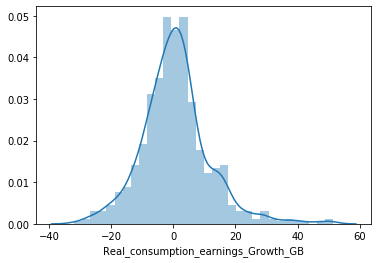

In [0]:
# Bonus data exploration with sns
# NO right skew!
import seaborn as sns
sns.distplot(y);

In [0]:
# Example code for log-transform. doesnt apply because of (-) values
# y_log = np.log1p(y)
# sns.distplot(y_log)
# y_untransformed = np.expm1(y_log)
# sns.distplot(y_untransformed)
# plt.title('Back to the original units');